Link to Download the data folder: https://drive.google.com/drive/folders/1JTjmLLzUT1J_a6WO6xJpxXXQDR4fNEGW?usp=sharing

## TEXT
#### So have you wondered how **Google is able to auto complete your query** ?

AND 

How **from the query give relevant web pages** !

- That's where **text becomes more informative** than just being words and gammers.

Lets take an Example:

- Supposedly we have a review from one of the users of a Service Company







          









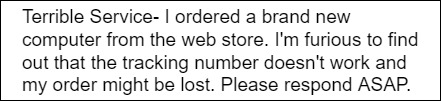

So what all can we understand from the phrase?
- Notice how just few words like **Terrible and Furious** are **enough to give the negative tone** of the review

- Also how **order, tracking number** were **enough** to get the sense of the **review is regarding Order Services**

- Finally how **ASAP, a kind of slang word,** shows the **urgency of the matter**




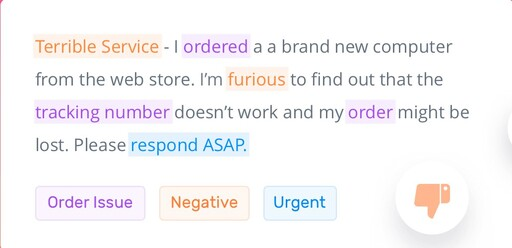

Though all these **keywords clubbed together** forms **no grammatical significance, they have more informative significance.**

#### So how can we make computer extract these keywords ?
- Removing punctuations
- Removing words (e.g: the , might , that) which do not provide much significance than grammar



with this,

### TASK: lets compute a similarity check between answers of student and the correct answer using only keywords.






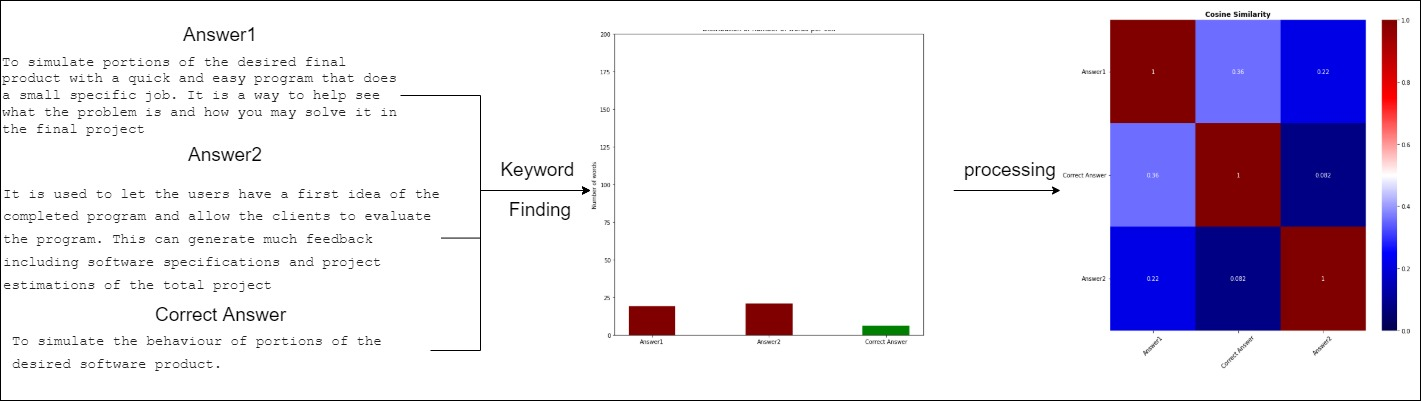

Lets **load the data** into python **using Pandas** library which is library to load files which are mostly in excel format 

In [5]:
import pandas as pd

#### What data do we have ?
- List of Correct Answers and the Answers given by students for 6 different questions. 

In [7]:
data = pd.read_csv('./textData.csv')
data.head()

,Question Number,Answer,Marks,Correct Answer
0,1.1,High risk problems are address in the prototyp...,3.5,To simulate the behaviour of portions of the d...
1,1.1,To simulate portions of the desired final prod...,5.0,To simulate the behaviour of portions of the d...
2,1.1,A prototype program simulates the behaviors of...,4.0,To simulate the behaviour of portions of the d...
3,1.1,Defined in the Specification phase a prototype...,5.0,To simulate the behaviour of portions of the d...
4,1.1,It is used to let the users have a first idea ...,3.0,To simulate the behaviour of portions of the d...


Lets now consider **Correct Answer** for **question 1.1** 

In [8]:
correc_answer = data['Correct Answer'][0]
correc_answer

'To simulate the behaviour of portions of the desired software product.'

### Letter Casing
#### What all can we understand from our Answer Sentence?
- Notice how words like **Simulate, behaviour, desired, software, products** are enough to understand the context of the correct answer .

- Also Notice how **To** is in **Upper case while the rest are in Lower case** 


#### Now since python is case sensitive, it will consider same word with different cases as two separate words!
 

Lets take an example:



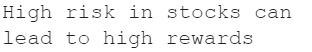

- So **python would consider the word High and high as two separate words** 

Even Though 

- the **context of the word is the same.**

With this,

Lets convert our correct answer to lower case !

In [9]:
correc_answer = correc_answer.lower()
correc_answer

'to simulate the behaviour of portions of the desired software product.'

### Tokenization

- If we **Recall from the Image Processing**, how **Computer algorithms require vectors or matrix to perform operations.**

Similarly 

- to **peform operations** on  **our correct answer**, we will need to **change it into a vector format**

#### So how can we convert a sentence to vector format ?
- We Tokenize or **split the sentences or phrases or text documents into words**

So for tokenzing the data, we will be using `nltk` library which helps in processing of text data in python 

In [11]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 281 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 1.9 MB/s eta 0:00:01


In [12]:
import nltk 
from nltk import word_tokenize

nltk.download('punkt') #tokenizer method which uses unsupervised algorithm to create word into tokens

correc_answer = word_tokenize(correc_answer)
correc_answer

[nltk_data] Downloading package punkt to /Users/harshit/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['to',
 'simulate',
 'the',
 'behaviour',
 'of',
 'portions',
 'of',
 'the',
 'desired',
 'software',
 'product',
 '.']

Now recall, the words like **Simulate, behaviour, desired, software, products are enough** to understand the context of the text

So what about the **remaining part of the text**

- Lets recall our Terrible Service Example:

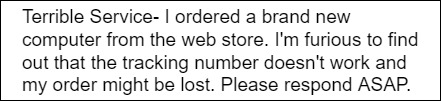


- Notice the words like **I, a, from, the , I'm, to, that, doesn't** only provide the **grammatical significances** 

AND

-  if we **remove these words**, they **do not change the context** of the text.  



So we will be using nltk `stopwords` which is a collection\corpus of common words 


So lets see the many stopwords which are provided by nltk    

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords') # Installs the Corpus (collection) of common words   

stop_w = stopwords.words('english') # We will only consider english words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshit/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now if we **notice  in our word vector**,  
We had a **fullstop (.) as one of the element.** 

As **Punctuations do not carry any significant information** we will **remove it using a hack with stopwords list.**
  - We do this by **extending the  stopwords list** and **adding a fullstop as one of the element** 

lets now remove noise words from the word vector !

In [14]:
# stop_w.extend('.')
correc_answer = [word for word in correc_answer if word not in stop_w]
correc_answer

['simulate', 'behaviour', 'portions', 'desired', 'software', 'product', '.']

Notice these **keywords**  are enough to understand the context of the sentence

BUT

- notice **the word desired** 

Supposedly if the word vector is like:

**['simulate', 'behaviour', 'portions', 'desired', 'software', 'product', 'desire']**

- Notice  the **two forms of word desire!** 

#### Even though both the forms of **word "desire" have the same meaning**, **python will consider it as two separate words** 


- So Replacing the **different form of word** into a **single common word** called **root Word** seems logical.

Before we see how root words are created lets first understand how a word is created
 
Lets take an example:
- Supposedly you have a word **unacceptable**


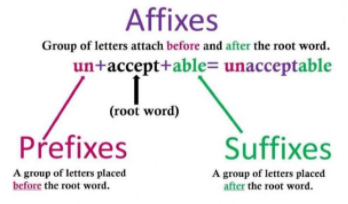

- Notice the **root word for un-accept-able is accept**
- Notice any word coming before the root word is our Prefix 

AND
-  any word after the root word becomes our suffix

Now that we have understand how the word are structured 

### Stemming
#### so how can we create root word ?
- by just **removing the prefix and suffix** might work.



So Lets now implement stemming on to our vector of words!
 

In [15]:
from nltk.stem import PorterStemmer
# There are more methods of how stemming can be performed, but PorterStemmer is one of the most 
# used stemming approach

ps = PorterStemmer() 
stem_words = [ps.stem(w) for w in correc_answer]
stem_words

['simul', 'behaviour', 'portion', 'desir', 'softwar', 'product', '.']

- Notice **stemming removed the problem of different form of words**

BUT
- Created a **problem where words are not grammatically correct.**

- These **grammatically wrong words may not be relevant for our task** since **all of the word in the answers of student will be changed** into one single common word

BUT

-  it becomes **relevant where grammer is very important** for e.g. word checker when writing Emails.      

- **Stemming is hence a more naive approach**,

A more **better approach is to replace the different form of words by its dictonary word.**

- Lets now implement lemmatization on our word vector


In [ ]:
from nltk.stem import WordNetLemmatizer # Word net is a corpus of root words in its simplest form 
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lem_words = [ lemmatizer.lemmatize(word) for word in correc_answer] 
lem_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['simulate', 'behaviour', 'portion', 'desired', 'software', 'product']

- Notice that lemmatization keeps the grammer 

AND
- **replaces** the word **portions to portion**

BUT 

- **fails to convert word desired to desire**

Hence **stemming is mostly prefered over lemmatization**.



Lets now consider answer of **student 1 and student 4** on which we will perform our similarity !

In [ ]:
answers = [data['Answer'][1]]
answers.append(data['Answer'][4])
answers 

['To simulate portions of the desired final product with a quick and easy program that does a small specific job. It is a way to help see what the problem is and how you may solve it in the final project.',
 'It is used to let the users have a first idea of the completed program and allow the clients to evaluate the program. This can generate much feedback including software specifications and project estimations of the total project.']

Lets now plot the number of words in each answer

Text(0, 0.5, 'Number of words')

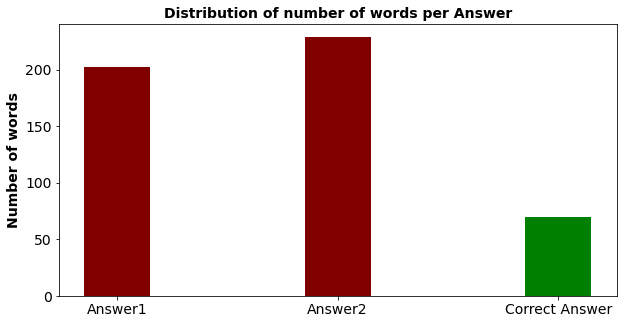

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 14})
values = [len(answer) for answer in answers]
plt.bar(['Answer1','Answer2'], values, color ='maroon',width = 0.3)
plt.bar(['Correct Answer'], [len(data['Correct Answer'][0])], color ='green',width = 0.3)
plt.title('Distribution of number of words per Answer',weight='bold',fontsize=14)
plt.ylabel("Number of words",weight='bold',fontsize=14)


Notice **how important it becomes to extract keywords** from answers 

AS
- **Computing and analyzing would be time consuming** (So many words on which analysis is to be performed)   


Lets now perform keyword extraction process which we did earlier on the correct Answer 

Text(0, 0.5, 'Number of words')

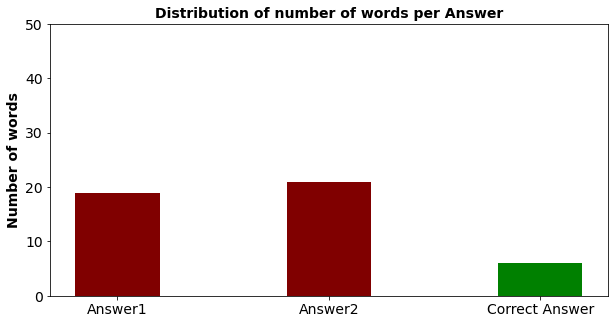

In [ ]:
student1 = answers[0]

student1 = student1.lower()
student1 = word_tokenize(student1)
student1 = [word for word in student1 if word not in stop_w]
student1 = [ps.stem(w) for w in student1]

student4 = answers[1]
student4 = student4.lower()
student4 = word_tokenize(student4)
student4 = [word for word in student4 if word not in stop_w]
student4 = [ps.stem(w) for w in student4]

correc_answer = stem_words

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 14})
values = [len(answer) for answer in answers]
plt.bar(['Answer1','Answer2'], [len(student1),len(student4)] , color ='maroon',width = 0.4)
plt.bar(['Correct Answer'], [len(correc_answer)], color ='green',width = 0.4)

plt.title('Distribution of number of words per Answer',weight='bold',fontsize=14)
plt.ylim(0,50)
plt.ylabel("Number of words",weight='bold',fontsize=14)


Notice how **words < 20 are sufficient to get the entirity of the answers**   

- **Recall in the image processing**, how **image is a 3-D Matrix of just numbers.** 

HENCE

- For **actual analysis, the vector of words are needed to be changed into a numeric form.**

#### How can we change word into numeric data?
- Maybe by **manually giving values to each of the word**

#### But what if there are million of words, will manually assigning values work?
- Not really
HENCE
- From all the different methods, **the most simple method is to give a count value of how many times the word occurs in the answer.** 

- This will **create a 2-D matrix with words in the columns**

AND 

- **Answers of students in the row**

This **matrix is known as term-document matrix**  

Lets now implement it using `sklearn` library which contains majority of Machine Learning Algorithms  

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()


docs = [
        ' '.join(correc_answer),
        ' '.join(student1),
        ' '.join(student4)
]

x1 = vectorizer.fit_transform(docs)
df = pd.DataFrame(x1.toarray(), index = ['Correct Answer','Answer1','Answer2'], 
                  columns = vectorizer.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,allow,behaviour,client,complet,desir,easi,estim,evalu,feedback,final,first,gener,help,idea,includ,job,let,may,much,portion,problem,product,program,project,quick,see,simul,small,softwar,solv,specif,total,use,user,way
Correct Answer,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
Answer1,0,0,0,0,1,1,0,0,0,2,0,0,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1
Answer2,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,2,2,0,0,0,0,1,0,1,1,1,1,0


Now that **we converted our word into a numeric representation**

We can now **perform mathematical operations** to **find how similar the answers are to each other**

#### How can we now measure how similar the answers are to each other ?
- Maybe **check for each word count how many have the same values**
- Check **where the word count > 0 and then compute a mean over them**

#### From the variety of similarity measures, we will be using Cosine Similarity
- **Recall from the Linear Algebra** lessons,  how **Cosine Similarity are used to show how similar two vectors are** 


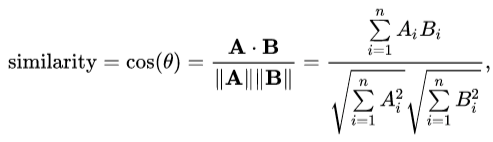

- Where A will be the numeric word count vector of one answer and B will be the numeric word count vector of another answer  


We will now **perform the same on our Answer vectors.**

In [ ]:
import numpy as np
import seaborn as sns

def cosine_similarity(A,B):
  return np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

In [ ]:
array = df.values
correct_answer = array[0]
answer1 = array[1]
answer2 = array[2]


q1 = cosine_similarity(answer1,answer1)
q2 = cosine_similarity(correct_answer,answer1)
q3 = cosine_similarity(answer1,answer2)

q4 = cosine_similarity(correct_answer,answer2)
q5 = cosine_similarity(answer2,answer2)

q6 = cosine_similarity(correct_answer,correct_answer)



output = [  [q1,q2,q3],[q2,q6,q4],[q3,q4,q5] ]

In [ ]:
output = pd.DataFrame(output,index=['Answer1','Correct Answer','Answer2'], columns=['Answer1','Correct Answer','Answer2'])
output

,Answer1,Correct Answer,Answer2
Answer1,1.000000,0.356348,0.218218
Correct Answer,0.356348,1.000000,0.081650
Answer2,0.218218,0.081650,1.000000


Text(65.0, 0.5, ' ')

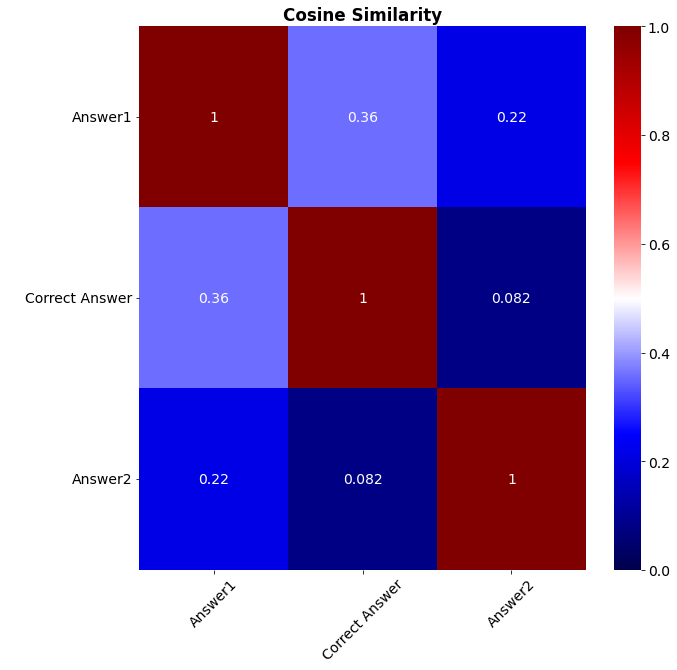

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cosine Similarity',weight='bold')

sns.heatmap(output,vmin=0.0,vmax=1.0,cmap='seismic',annot=True)
plt.tick_params(labelbottom=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.ylabel(' ')

- With this, we see how from text we can process and extract crucial information.

- We will further see more **types of text data** and their **analysis** when we will **talk about NLP.** 
   